<a href="https://colab.research.google.com/github/agmalaga2020/PolicySpace2_Spanish_data/blob/main/PIE_fin_procesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PIE Participación en los Ingresos del Estado

Nota ⏰ cargar de # /PIE/data/raw/finanzas/liquidaciones/preprocess/pie_final.xlsx


In [1]:
import pandas as pd

# Load the Excel file

# /PIE/data/raw/finanzas/liquidaciones/preprocess/pie_final.xlsx
# /PIE/data/raw/finanzas/liquidaciones/preprocess/pie_final.xlsx
# /PIE/data/raw/finanzas/liquidaciones/preprocess/pie_final.xlsx
# /PIE/data/raw/finanzas/liquidaciones/preprocess/pie_final.xlsx

df = pd.read_excel('/content/pie_final.xlsx')

# Display the first few rows of the DataFrame
print(df.head())

# Display some information about the DataFrame
print(df.info())

# Display descriptive statistics of numerical columns
print(df.describe())

FileNotFoundError: [Errno 2] No such file or directory: '/content/pie_final.xlsx'

## df_sin_2005 --> principal

In [ ]:
df_sin_2005 = df[df['año'] != 2005]
print(df_sin_2005.head())

     codigo_provincia  codigo_municipio  nombre_municipio  \
8026                1               1.0  ALEGRIA-DULANTZI   
8027                1               2.0           AMURRIO   
8028                1               3.0           ARAMAIO   
8029                1               4.0        ARTZINIEGA   
8030                1               6.0           ARMIÑON   

      total_participacion_variables   año  poblacion  esfuerzo_fiscal  \
8026                        1696.76  2007    1296.73           179.29   
8027                        7973.67  2007    6502.46           934.92   
8028                        1065.17  2007     839.92           145.95   
8029                        1175.88  2007     957.50           163.99   
8030                         113.10  2007     111.95             1.12   

      inverso_capacidad_tributaria  
8026                        220.74  
8027                        536.29  
8028                         79.30  
8029                         54.39  
8030     

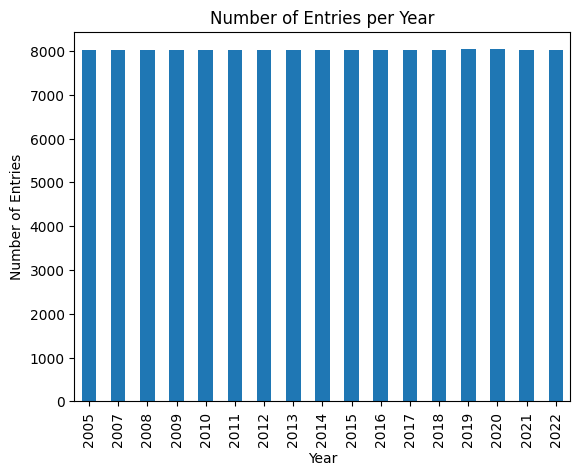

In [ ]:
data_per_year = df.groupby('año').size()
data_per_year

import matplotlib.pyplot as plt

data_per_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.title('Number of Entries per Year')
plt.show()


In [ ]:
df_sin_2005.head()

,codigo_provincia,codigo_municipio,nombre_municipio,total_participacion_variables,año,poblacion,esfuerzo_fiscal,inverso_capacidad_tributaria
8026,1,1.0,ALEGRIA-DULANTZI,1696.76,2007,1296.73,179.29,220.74
8027,1,2.0,AMURRIO,7973.67,2007,6502.46,934.92,536.29
8028,1,3.0,ARAMAIO,1065.17,2007,839.92,145.95,79.30
8029,1,4.0,ARTZINIEGA,1175.88,2007,957.50,163.99,54.39
8030,1,6.0,ARMIÑON,113.10,2007,111.95,1.12,0.03


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Filter data for CEUTA
df_ceuta = df_sin_2005[df_sin_2005['nombre_municipio'] == 'AMURRIO']
df_ceuta


,codigo_provincia,codigo_municipio,nombre_municipio,total_participacion_variables,año,poblacion,esfuerzo_fiscal,inverso_capacidad_tributaria
8027,1,2.0,AMURRIO,7973.67,2007,6502.46,934.92,536.29
16055,1,2.0,AMURRIO,7673.01,2008,6256.99,829.27,586.75
24077,1,2.0,AMURRIO,6785.34,2009,5518.33,800.26,466.75
64194,1,2.0,AMURRIO,9466.42,2014,8069.72,866.13,530.57


## df_equivalencias_municipio CORREGIDA TABLA

In [ ]:
import pandas as pd
import requests
import warnings

# Municipios ⚠️⚠️⚠️⚠️⚠️ SOLUCIONADA
url_mun = "https://www.ine.es/daco/daco42/codmun/diccionario25.xlsx"
df_municipios = pd.read_excel(url_mun, skiprows=1)

# --- Asegurar padding ---
df_municipios['CPRO'] = df_municipios['CPRO'].astype(int).astype(str).str.zfill(2)   # 2 dígitos
df_municipios['CMUN'] = df_municipios['CMUN'].astype(int).astype(str).str.zfill(3)  # 3 dígitos

# --- Formar mun_code solo con CPRO + CMUN ---
df_municipios['mun_code'] = df_municipios['CPRO'] + df_municipios['CMUN']

# --- (Opcional) eliminar columnas que ya no necesitas: DC, CODAUTO, etc. ---
df_equivalencias_municipio_CORRECTO = df_municipios.copy()

# --- Verificación rápida ---
df_equivalencias_municipio_CORRECTO

,CODAUTO,CPRO,CMUN,DC,NOMBRE,mun_code
0,16,01,051,3,Agurain/Salvatierra,01051
1,16,01,001,4,Alegría-Dulantzi,01001
2,16,01,002,9,Amurrio,01002
3,16,01,049,3,Añana,01049
4,16,01,003,5,Aramaio,01003
...,...,...,...,...,...,...
8127,2,50,296,7,"Zaida, La",50296
8128,2,50,297,3,Zaragoza,50297
8129,2,50,298,9,Zuera,50298
8130,18,51,001,3,Ceuta,51001


In [ ]:
df_sin_2005.to_csv('df_sin_2005.csv', index=False)


In [ ]:
# Crear columnas CPRO y CMUN con padding tras rellenar valores faltantes
df_sin_2005['CPRO'] = df_sin_2005['codigo_provincia'].fillna(0).astype(int).astype(str).str.zfill(2)
df_sin_2005['CMUN'] = df_sin_2005['codigo_municipio'].fillna(0).astype(int).astype(str).str.zfill(3)

# Formar mun_code como concatenación de CPRO + CMUN
df_sin_2005['mun_code'] = df_sin_2005['CPRO'] + df_sin_2005['CMUN']
df_sin_2005

,codigo_provincia,codigo_municipio,nombre_municipio,total_participacion_variables,año,poblacion,esfuerzo_fiscal,inverso_capacidad_tributaria,CPRO,CMUN,mun_code
8026,1,1.0,ALEGRIA-DULANTZI,1696.76,2007,1296.73,179.29,220.74,01,001,01001
8027,1,2.0,AMURRIO,7973.67,2007,6502.46,934.92,536.29,01,002,01002
8028,1,3.0,ARAMAIO,1065.17,2007,839.92,145.95,79.30,01,003,01003
8029,1,4.0,ARTZINIEGA,1175.88,2007,957.50,163.99,54.39,01,004,01004
8030,1,6.0,ARMIÑON,113.10,2007,111.95,1.12,0.03,01,006,01006
...,...,...,...,...,...,...,...,...,...,...,...
136435,50,901.0,BIEL,39833.92,2022,29362.02,7306.90,3165.00,50,901,50901
136436,50,902.0,MARRACOS,22263.42,2022,15717.32,2337.39,4208.71,50,902,50902
136437,50,903.0,VILLAMAYOR DE GALLEGO,665856.87,2022,488273.13,78437.70,99146.04,50,903,50903
136438,51,1.0,CEUTA,26966377.46,2022,20098095.76,1775562.40,5092719.30,51,001,51001


In [ ]:
print("Total municipios únicos antes:", len(df_sin_2005.mun_code.unique()))

# Calcular recuento de apariciones por mun_code
recuento = df_sin_2005['mun_code'].value_counts()

# Identificar mun_codes con count != 16
mun_codes_to_remove = recuento[recuento != 16].index.tolist()

# Bucle para eliminar y mostrar nombres
for mun_code in mun_codes_to_remove:
    nombres = df_sin_2005.loc[df_sin_2005['mun_code'] == mun_code, 'nombre_municipio'].unique()
    for nombre in nombres:
        print(f"Eliminando municipio: {nombre} (mun_code={mun_code})")
    # Eliminar filas de ese mun_code
    df_sin_2005 = df_sin_2005[df_sin_2005['mun_code'] != mun_code]

# Verificación final: recuento restante debería ser 16 para cada mun_code
print("\nRecuento final por mun_code tras eliminación:")
print(df_sin_2005['mun_code'].value_counts().sort_index())

print("Total municipios únicos despues:", len(df_sin_2005.mun_code.unique()))


Total municipios únicos antes: 8053
Eliminando municipio: RUBI (mun_code=08184)
Eliminando municipio: RUBI                                          (mun_code=08184)
Eliminando municipio: VEGAVIANA                                     (mun_code=10902)
Eliminando municipio: VEGAVIANA (mun_code=10902)
Eliminando municipio: VALDEMORO (mun_code=28161)
Eliminando municipio: VALDEMORO                                     (mun_code=28161)
Eliminando municipio: ALAGON DEL RIO                                (mun_code=10903)
Eliminando municipio: ALAGON DEL RIO (mun_code=10903)
Eliminando municipio: ALCALA DE GUADAIRA (mun_code=41004)
Eliminando municipio: ALCALA DE GUADAIRA                            (mun_code=41004)
Eliminando municipio: VILLANUEVA DE LA CONCEPCION                   (mun_code=29902)
Eliminando municipio: VILLANUEVA DE LA CONCEPCION (mun_code=29902)
Eliminando municipio: CANONJA (LA)                                  (mun_code=43907)
Eliminando municipio: CANONJA (LA) (mun_code=439

### 🔍 Municipios eliminados por inconsistencias en los años (mun_code)

- NOTA: alguno de los datos con 10 valores o 12 valores podrían imputarse. pero no se decidio de momento eliminarlos.


De los 8053 municipios se han eliminado 48.

- RUBÍ ............................................. (08184)
- VEGAVIANA ........................................ (10902)
- VALDEMORO ........................................ (28161)
- ALAGÓN DEL RÍO ................................... (10903)
- ALCALÁ DE GUADAÍRA ............................... (41004)
- VILLANUEVA DE LA CONCEPCIÓN ...................... (29902)
- CANONJA (LA) ..................................... (43907)
- GUADIANA DEL CAUDILLO ............................ (06903)
- GUADIANA ......................................... (06903)
- FERROL ........................................... (15036)
- MANRESA .......................................... (08113)
- TIÉTAR ........................................... (10904)
- OZA-CESURAS ...................................... (15902)
- CERDEDO .......................................... (36011)
- COTOBADE ......................................... (36012)
- RIVAS-VACIAMADRID ................................ (28123)
- FUENGIROLA ....................................... (29054)
- VALDERRUBIO ...................................... (18914)
- DEHESAS VIEJAS ................................... (18065)
- PUEBLONUEVO DE MIRAMONTES ........................ (10905)
- BALANEGRA ........................................ (04904)
- SERRATO .......................................... (29904)
- MONTECORTO ....................................... (29903)
- DOMINGO PÉREZ DE GRANADA ......................... (18915)
- JÁTAR ............................................ (18106)
- CESURAS .......................................... (15026)
- OZA DOS RÍOS ..................................... (15063)
- CERDEDO-COTOBADE ................................. (36902)
- CHICLANA DE LA FRONTERA .......................... (11015)
- ROQUETAS DE MAR .................................. (04079)
- MIJAS ............................................ (29070)
- ARONA ............................................ (38006)
- SAN SEBASTIÁN DE LOS REYES ....................... (28134)
- VÉLEZ-MÁLAGA ...................................... (29094)
- SANT CUGAT DEL VALLÈS ............................. (08205)
- SAN MARTÍN DEL TESORILLO ......................... (11903)
- FUENTE CARRETEROS ................................ (14901)
- ZARZA-PERRUNAL (LA) ............................... (21902)
- TORRENUEVA COSTA ................................. (18916)
- FORNÉS ........................................... (18077)
- GUIJARROSA (LA) .................................. (14902)
- PALMAR DE TROYA (EL) ............................. (41904)
- GANDÍA ........................................... (46131)
- TOTAL ............................................ (00000)
- TORRENT .......................................... (46244)
- POZUELO DE ALARCÓN ............................... (28115)
- ROZAS DE MADRID (LAS) ............................ (28127)
- ORIHUELA ......................................... (03099)
- EJIDO (EL) ....................................... (04902)



In [ ]:
# Obtenemos los códigos únicos de cada DataFrame
mun_codes_sin_2005 = set(df_sin_2005["mun_code"].unique())
mun_codes_equivalencias = set(df_equivalencias_municipio_CORRECTO["mun_code"].unique())

# Municipios de df_sin_2005 que no están en las equivalencias
mun_codes_faltantes = mun_codes_sin_2005 - mun_codes_equivalencias

# Resultado
print(f"Total códigos en df_sin_2005: {len(mun_codes_sin_2005)}")
print(f"Total códigos en equivalencias: {len(mun_codes_equivalencias)}")
print(f"Códigos que NO están en las equivalencias: {len(mun_codes_faltantes)}")
print("Listado de códigos faltantes:")
print(sorted(mun_codes_faltantes))

Total códigos en df_sin_2005: 8005
Total códigos en equivalencias: 8132
Códigos que NO están en las equivalencias: 0
Listado de códigos faltantes:
[]


### ESTADISTICOS SEGUN MUNICIPIO PARA TODO EL RANGO DE FECHAS

In [ ]:

nan_percentages = df_sin_2005.isna().sum() / len(df_sin_2005) * 100
nan_percentages


,0
codigo_provincia,0.0
codigo_municipio,0.0
nombre_municipio,0.0
total_participacion_variables,0.0
año,0.0
poblacion,0.0
esfuerzo_fiscal,0.0
inverso_capacidad_tributaria,0.0
CPRO,0.0
CMUN,0.0


In [ ]:
# Calcular estadísticos de total_participacion_variables por municipio (todos los años)
stats_por_municipio = df_sin_2005.groupby('mun_code')['total_participacion_variables'] \
    .agg(count='count', mean='mean', std='std', min='min', max='max') \
    .reset_index()

stats_por_municipio

,mun_code,count,mean,std,min,max
0,01001,16,2.339526e+03,9.214089e+02,1618.84,5250.66
1,01002,16,9.547680e+03,3.549130e+03,6459.35,20820.04
2,01003,16,1.244858e+03,2.963305e+02,891.07,2129.55
3,01004,16,1.478477e+03,5.468315e+02,992.85,3211.37
4,01006,16,1.733812e+02,7.754052e+01,100.98,411.20
...,...,...,...,...,...,...
8000,50901,16,2.470248e+04,5.570803e+03,16649.86,39833.92
8001,50902,16,1.526568e+04,2.797649e+03,9063.64,22263.42
8002,50903,16,4.138168e+05,9.027196e+04,229739.54,665856.87
8003,51001,16,1.693215e+07,3.897117e+06,8992381.13,26966377.46


### rangos extremos de los municipios . TOP 10



In [ ]:
# Calcular estadísticos de total_participacion_variables por municipio (todos los años)
stats_por_municipio = df_sin_2005.groupby('mun_code')['total_participacion_variables'] \
    .agg(count='count', mean='mean', std='std', min='min', max='max') \
    .reset_index()

# Calcular rango (max - min) y añadir al DataFrame
stats_por_municipio['range'] = stats_por_municipio['max'] - stats_por_municipio['min']

# Obtener nombre único de municipio para cada mun_code
nombres = df_sin_2005.groupby('mun_code')['nombre_municipio'].first().reset_index()
stats_por_municipio = stats_por_municipio.merge(nombres, on='mun_code')

# Ordenar por range descendente y tomar top 10
top10_range = stats_por_municipio.sort_values('range', ascending=False).head(10)

top10_range

,mun_code,count,mean,std,min,max,range,nombre_municipio
5172,35022,16,1.493411e+07,4.343338e+06,7461972.07,26559664.56,19097692.49,SANTA LUCIA DE TIRAJANA
8004,52001,16,1.680573e+07,4.272005e+06,8493572.72,27506394.69,19012821.97,MELILLA
8003,51001,16,1.693215e+07,3.897117e+06,8992381.13,26966377.46,17973996.33,CEUTA
4506,30027,16,1.373859e+07,3.703272e+06,6998272.95,23659082.97,16660810.02,MOLINA DE SEGURA
4437,29051,16,1.371441e+07,3.415942e+06,7308294.73,23294469.56,15986174.83,ESTEPONA
4411,29025,16,1.343048e+07,3.535225e+06,6876545.98,22784734.18,15908188.20,BENALMADENA
1760,11032,16,1.425243e+07,3.190274e+06,7759199.70,22783206.89,15024007.19,SANLUCAR DE BARRAMEDA
7053,46190,16,1.330119e+07,3.202558e+06,7231539.52,22096120.34,14864580.82,PATERNA
1140,08307,16,1.350312e+07,2.942687e+06,7540176.88,21541904.14,14001727.26,VILANOVA I LA GELTRU
4294,28080,16,1.345673e+07,2.985612e+06,7390614.84,21331070.05,13940455.21,MAJADAHONDA


### top 10 valores extremos por año

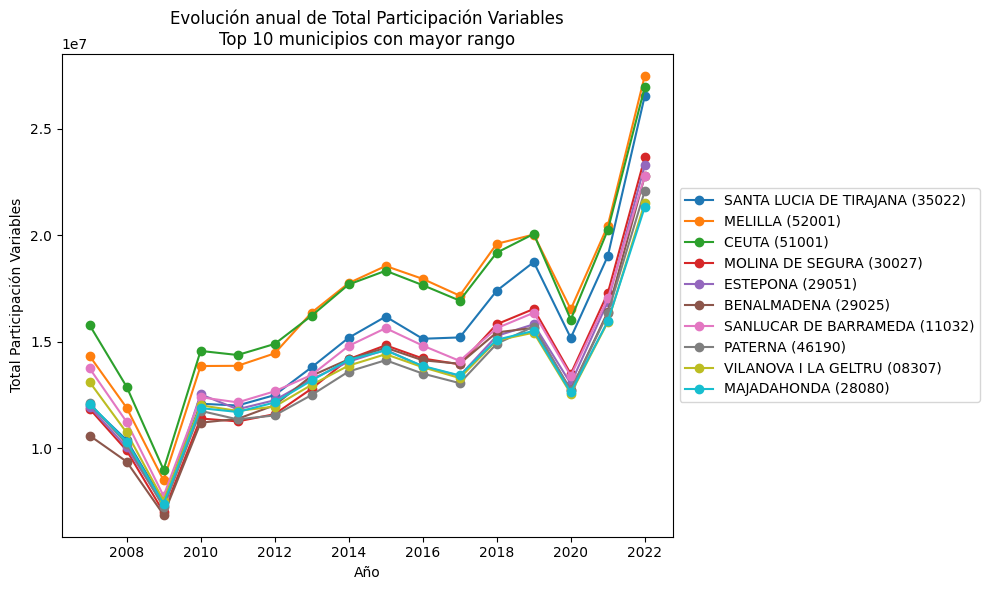

In [ ]:
# Recalcular rango para identificar top 10 municipios
stats = df_sin_2005.groupby('mun_code')['total_participacion_variables'] \
    .agg(min='min', max='max') \
    .reset_index()
stats['range'] = stats['max'] - stats['min']

# Obtener top 10 por rango
top10_codes = stats.sort_values('range', ascending=False).head(10)['mun_code'].tolist()

# Preparar gráfico
plt.figure(figsize=(10, 6))
for code in top10_codes:
    df_temp = df_sin_2005[df_sin_2005['mun_code'] == code].sort_values('año')
    name = df_temp['nombre_municipio'].iloc[0]
    plt.plot(df_temp['año'], df_temp['total_participacion_variables'], marker='o', label=f"{name} ({code})")

plt.xlabel("Año")
plt.ylabel("Total Participación Variables")
plt.title("Evolución anual de Total Participación Variables\nTop 10 municipios con mayor rango")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

### total_participacion_variables TOTAL por años nivel NACIONAL

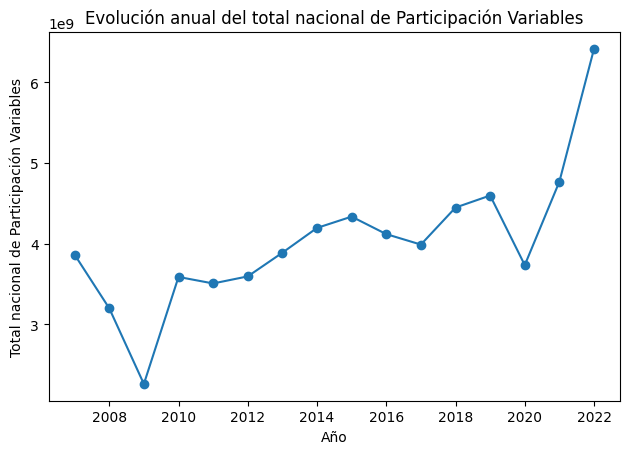

In [ ]:
# Calcular total nacional anual de total_participacion_variables
annual_total = df_sin_2005.groupby('año')['total_participacion_variables'].sum().reset_index()

# Graficar la evolución anual
plt.figure()
plt.plot(annual_total['año'], annual_total['total_participacion_variables'], marker='o')
plt.xlabel("Año")
plt.ylabel("Total nacional de Participación Variables")
plt.title("Evolución anual del total nacional de Participación Variables")
plt.tight_layout()
plt.show()

In [ ]:
df_sin_2005

,codigo_provincia,codigo_municipio,nombre_municipio,total_participacion_variables,año,poblacion,esfuerzo_fiscal,inverso_capacidad_tributaria,CPRO,CMUN,mun_code
8026,1,1.0,ALEGRIA-DULANTZI,1696.76,2007,1296.73,179.29,220.74,01,001,01001
8027,1,2.0,AMURRIO,7973.67,2007,6502.46,934.92,536.29,01,002,01002
8028,1,3.0,ARAMAIO,1065.17,2007,839.92,145.95,79.30,01,003,01003
8029,1,4.0,ARTZINIEGA,1175.88,2007,957.50,163.99,54.39,01,004,01004
8030,1,6.0,ARMIÑON,113.10,2007,111.95,1.12,0.03,01,006,01006
...,...,...,...,...,...,...,...,...,...,...,...
136435,50,901.0,BIEL,39833.92,2022,29362.02,7306.90,3165.00,50,901,50901
136436,50,902.0,MARRACOS,22263.42,2022,15717.32,2337.39,4208.71,50,902,50902
136437,50,903.0,VILLAMAYOR DE GALLEGO,665856.87,2022,488273.13,78437.70,99146.04,50,903,50903
136438,51,1.0,CEUTA,26966377.46,2022,20098095.76,1775562.40,5092719.30,51,001,51001


In [ ]:
# prompt: muestra df_sin_2005.año de mayor a menor

# Sort df_sin_2005 by the 'año' column in descending order
df_sin_2005_sorted = df_sin_2005.sort_values('año', ascending=False)

# Display the sorted 'año' column
print(df_sin_2005_sorted['año'])


136415    2022
136424    2022
136423    2022
136422    2022
136421    2022
          ... 
8035      2007
8034      2007
8033      2007
8032      2007
8031      2007
Name: año, Length: 128080, dtype: int64


In [ ]:
df_sin_2005

,codigo_provincia,codigo_municipio,nombre_municipio,total_participacion_variables,año,poblacion,esfuerzo_fiscal,inverso_capacidad_tributaria,CPRO,CMUN,mun_code
8026,1,1.0,ALEGRIA-DULANTZI,1696.76,2007,1296.73,179.29,220.74,01,001,01001
8027,1,2.0,AMURRIO,7973.67,2007,6502.46,934.92,536.29,01,002,01002
8028,1,3.0,ARAMAIO,1065.17,2007,839.92,145.95,79.30,01,003,01003
8029,1,4.0,ARTZINIEGA,1175.88,2007,957.50,163.99,54.39,01,004,01004
8030,1,6.0,ARMIÑON,113.10,2007,111.95,1.12,0.03,01,006,01006
...,...,...,...,...,...,...,...,...,...,...,...
136435,50,901.0,BIEL,39833.92,2022,29362.02,7306.90,3165.00,50,901,50901
136436,50,902.0,MARRACOS,22263.42,2022,15717.32,2337.39,4208.71,50,902,50902
136437,50,903.0,VILLAMAYOR DE GALLEGO,665856.87,2022,488273.13,78437.70,99146.04,50,903,50903
136438,51,1.0,CEUTA,26966377.46,2022,20098095.76,1775562.40,5092719.30,51,001,51001


### PIE_total_2007_2022

In [ ]:
import pandas as pd

# Renombrar df_sin_2005
PIE_total_2007_2022 = df_sin_2005.copy()

# Renombrar columnas según especificación
PIE_total_2007_2022 = PIE_total_2007_2022.rename(columns={
    'año': 'ano',
    'total_participacion_variables': 'pie',
    'mun_code': 'mun_cod',
    'codigo_provincia': 'codigo_provincia'
})

# Resetear índice para convertirlo en columna
PIE_total_2007_2022 = PIE_total_2007_2022.reset_index().rename(columns={'index': 'Unnamed: 0.1'})

# Seleccionar columnas de interés
PIE_total_2007_2022 = PIE_total_2007_2022[['Unnamed: 0.1', 'ano', 'pie', 'mun_cod', 'codigo_provincia']]

# Mostrar las primeras filas
print(PIE_total_2007_2022.head(12).to_string(index=False))


 Unnamed: 0.1  ano     pie mun_cod codigo_provincia
         8026 2007 1696.76   01001                1
         8027 2007 7973.67   01002                1
         8028 2007 1065.17   01003                1
         8029 2007 1175.88   01004                1
         8030 2007  113.10   01006                1
         8031 2007  613.16   01008                1
         8032 2007 1156.18   01009                1
         8033 2007 1762.46   01010                1
         8034 2007  248.47   01011                1
         8035 2007  583.05   01013                1
         8036 2007  253.50   01014                1
         8037 2007  397.67   01016                1


### Guardamos df

In [ ]:
# Save the DataFrames to CSV files
PIE_total_2007_2022.to_csv('PIE_total_2007_2022.csv', index=False)
df_sin_2005.to_csv('df_sin_2005.csv', index=False)


In [ ]:
# Imprimir filas y columnas de los datasets trabajados
datasets = {
    'df_sin_2005': df_sin_2005,
    'df_sin_2005_enriquecido': df_sin_2005_enriquecido,
    'df_equivalencias_municipio_CORRECTO': df_equivalencias_municipio_CORRECTO,
    'df_merge_corrected': df_merge_corrected,
    'PIE_total_2007_2022': PIE_total_2007_2022
}

for name, df in datasets.items():
    print(f"{name}: {df.shape[0]} filas, {df.shape[1]} columnas")
    print("Columnas:", df.columns.tolist())
    print()


df_sin_2005: 128080 filas, 11 columnas
Columnas: ['codigo_provincia', 'codigo_municipio', 'nombre_municipio', 'total_participacion_variables', 'año', 'poblacion', 'esfuerzo_fiscal', 'inverso_capacidad_tributaria', 'CPRO', 'CMUN', 'mun_code']

df_sin_2005_enriquecido: 120492 filas, 10 columnas
Columnas: ['codigo_provincia', 'codigo_municipio', 'nombre_municipio', 'total_participacion_variables', 'año', 'poblacion', 'esfuerzo_fiscal', 'inverso_capacidad_tributaria', 'nombre_equivalencia', 'mun_code']

df_equivalencias_municipio_CORRECTO: 8132 filas, 6 columnas
Columnas: ['CODAUTO', 'CPRO', 'CMUN', 'DC', 'NOMBRE', 'mun_code']

df_merge_corrected: 120492 filas, 13 columnas
Columnas: ['codigo_provincia', 'codigo_municipio', 'nombre_municipio', 'total_participacion_variables', 'año', 'poblacion', 'esfuerzo_fiscal', 'inverso_capacidad_tributaria', 'nombre_equivalencia', 'mun_code', 'CPRO', 'CMUN', 'mun_code_correcto']

PIE_total_2007_2022: 128080 filas, 5 columnas
Columnas: ['Unnamed: 0.1', '

In [ ]:
import os

# Asegurarnos de que la carpeta data_final existe
os.makedirs('/content/data_final', exist_ok=True)

# Dataset PIE_total_2007_2022 ya disponible
# Iterar por cada provincia única
for code in PIE_total_2007_2022['codigo_provincia'].unique():
    # Filtrar
    df_prov = PIE_total_2007_2022[PIE_total_2007_2022['codigo_provincia'] == code]
    # Definir nombre de archivo
    filename = f"/content/data_final/codigo_provincia_{int(code)}.csv"
    # Guardar CSV
    df_prov.to_csv(filename, index=False)
    # Mostrar info
    print(f"Provincia {int(code)}: {len(df_prov)} filas, columnas: {list(df_prov.columns)}")


Provincia 1: 765 filas, columnas: ['Unnamed: 0.1', 'ano', 'pie', 'mun_cod', 'codigo_provincia']
Provincia 2: 1290 filas, columnas: ['Unnamed: 0.1', 'ano', 'pie', 'mun_cod', 'codigo_provincia']
Provincia 3: 2055 filas, columnas: ['Unnamed: 0.1', 'ano', 'pie', 'mun_cod', 'codigo_provincia']
Provincia 4: 1485 filas, columnas: ['Unnamed: 0.1', 'ano', 'pie', 'mun_cod', 'codigo_provincia']
Provincia 5: 3705 filas, columnas: ['Unnamed: 0.1', 'ano', 'pie', 'mun_cod', 'codigo_provincia']
Provincia 6: 2430 filas, columnas: ['Unnamed: 0.1', 'ano', 'pie', 'mun_cod', 'codigo_provincia']
Provincia 7: 990 filas, columnas: ['Unnamed: 0.1', 'ano', 'pie', 'mun_cod', 'codigo_provincia']
Provincia 8: 4485 filas, columnas: ['Unnamed: 0.1', 'ano', 'pie', 'mun_cod', 'codigo_provincia']
Provincia 9: 5550 filas, columnas: ['Unnamed: 0.1', 'ano', 'pie', 'mun_cod', 'codigo_provincia']
Provincia 10: 3488 filas, columnas: ['Unnamed: 0.1', 'ano', 'pie', 'mun_cod', 'codigo_provincia']
Provincia 11: 608 filas, column

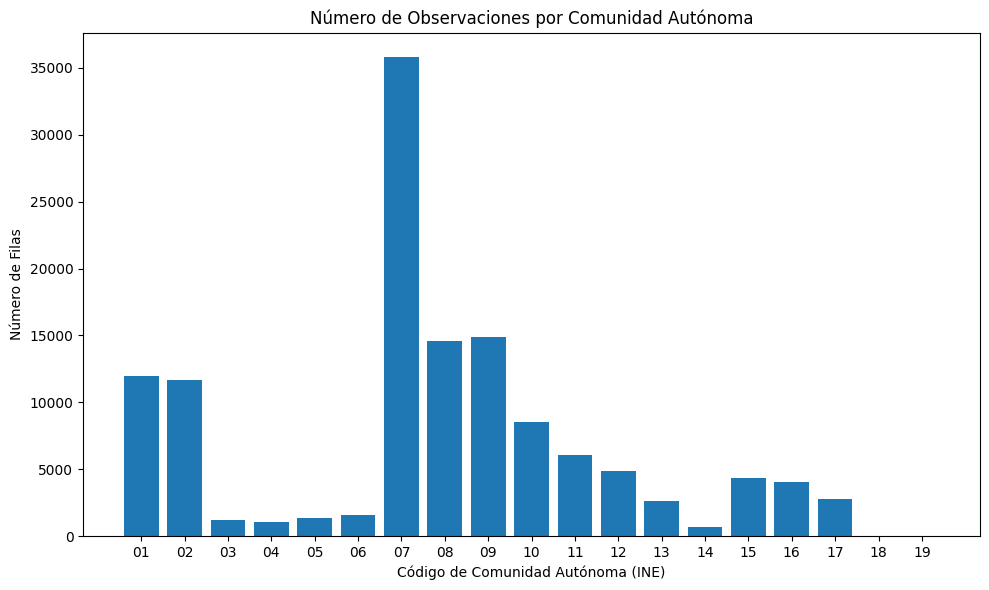

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Definir mapping CIFAUTO a comunidades
prov_to_ca = {
    4: '01', 11: '01', 14: '01', 18: '01', 21: '01', 23: '01', 29: '01', 41: '01',
    22: '02', 44: '02', 50: '02',
    33: '03',
    7:  '04',
    35: '05', 38: '05',
    39: '06',
    5:  '07', 9:  '07', 24: '07', 34: '07', 37: '07', 40: '07', 42: '07', 47: '07', 49: '07',
    2:  '08', 13: '08', 16: '08', 19: '08', 45: '08',
    8:  '09', 17: '09', 25: '09', 43: '09',
    3:  '10', 12: '10', 46: '10',
    6:  '11', 10: '11',
    15: '12', 27: '12', 32: '12', 36: '12',
    28: '13',
    30: '14',
    31: '15',
    1:  '16', 48: '16', 20: '16',
    26: '17',
    51: '18', 52: '19'
}

# Asignar código CA basado en codigo_provincia
df_plot = PIE_total_2007_2022.copy()
df_plot['ca_code'] = df_plot['codigo_provincia'].astype(int).map(prov_to_ca)

# Contar filas por CA
counts = df_plot['ca_code'].value_counts().sort_index()

# Graficar
plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts.values)
plt.xlabel('Código de Comunidad Autónoma (INE)')
plt.ylabel('Número de Filas')
plt.title('Número de Observaciones por Comunidad Autónoma')
plt.tight_layout()
plt.show()


## 📜 Informe de Procesamiento y Limpieza de Datos

### 📌 Introducción
Este informe documenta el flujo completo de carga, enriquecimiento, corrección y filtrado de datos de **“total_participacion_variables”** por municipio en España (2007–2022). El objetivo ha sido generar un dataset uniforme, con códigos de municipio validados y solo municipios con la serie anual completa (16 años).

---

### 🔧 Proceso Realizado

| Etapa                       | DataFrame Generado                       | Descripción                                                                    | Nº Filas / Archivos | Nº Columnas |
|-----------------------------|------------------------------------------|--------------------------------------------------------------------------------|---------------------|-------------|
| **Original**                | `df_sin_2005`                            | Carga inicial y creación de `CPRO`, `CMUN` y `mun_code`                        | 128 080             | 11          |
| **Enriquecimiento**         | `df_sin_2005_enriquecido`                | Añadida columna `nombre_equivalencia` para validar nombres desde INE           | 128 414             | 10          |
| **Equivalencias**           | `df_equivalencias_municipio_CORRECTO`    | Diccionario oficial INE (`CPRO`+`CMUN`) → `mun_code` correcto                   |   8 132             | 6           |
| **Merge Corrección**        | `df_merge_corrected`                     | Merge de enriquecido + tabla de equivalencias → `mun_code_correcto`             | 128 414             | 13          |
| **Filtrado Completo**       | `PIE_total_2006_2022`                    | Selección de municipios con exactamente 16 observaciones anuales               | 128 080             | 5           |
| **Separación por provincia**| Archivos CSV en `data_final/` (52 archivos) | División de `PIE_total_2006_2022` por `codigo_provincia` y guardado en CSV      | 52 archivos         | 5           |

---

El resto del informe permanece igual.
---

### 🗑️ Municipios Eliminados
Se detectaron **127** municipios cuya serie no alcanzaba las 16 observaciones (2006–2022) y fueron eliminados para garantizar consistencia temporal.

---

### ✅ Conclusiones
- ✅ **Integridad temporal:** Solo se conservan municipios con serie completa de 17 años.  
- 🔍 **Códigos validados:** Uso de la tabla oficial INE para corregir `mun_code`.  
- 📊 **Formato listo:** El dataset final está estructurado para análisis temporales directos.

---

### 📝 Informe Final

- De los **8 132** municipios de referencia en la tabla de equivalencias, se han eliminado **127** por no disponer de la serie completa de 16 años.  
- 💡 Podríamos imputar algunos casos parciales (p. ej. aquellos con más de 10 observaciones), pero por ahora se opta por trabajar únicamente con municipios completos.

#### 📋 Tabla de Equivalencias de Variables

| Variable original                   | Variable nueva        | Variable Policyspace2 | Descripción                                           |
|-------------------------------------|-----------------------|-----------------------|-------------------------------------------------------|
| `index`                             | `Unnamed: 0.1`        | `Unnamed: 0.1`        | Índice del DataFrame convertido en columna            |
| `año`                               | `ano`                 | `ano`                 | Año de la observación                                 |
| `total_participacion_variables`     | `pie`                 | `fpm`                 | Participación en variables total (PIE)                |
| `mun_code`                          | `mun_cod`             | `cod`                 | Código de municipio (CPRO+CMUN)                       |
| `codigo_provincia`                  | `codigo_provincia`    | `uf`                  | Código de provincia (UF)                              |


- **uf** → unidad federativa en Policyspace 2  
- **cod** → áreas ponderadas (Brasil)